Accuracy: 0.9616977225672878
Confusion Matrix:
[[803  15]
 [ 22 126]]


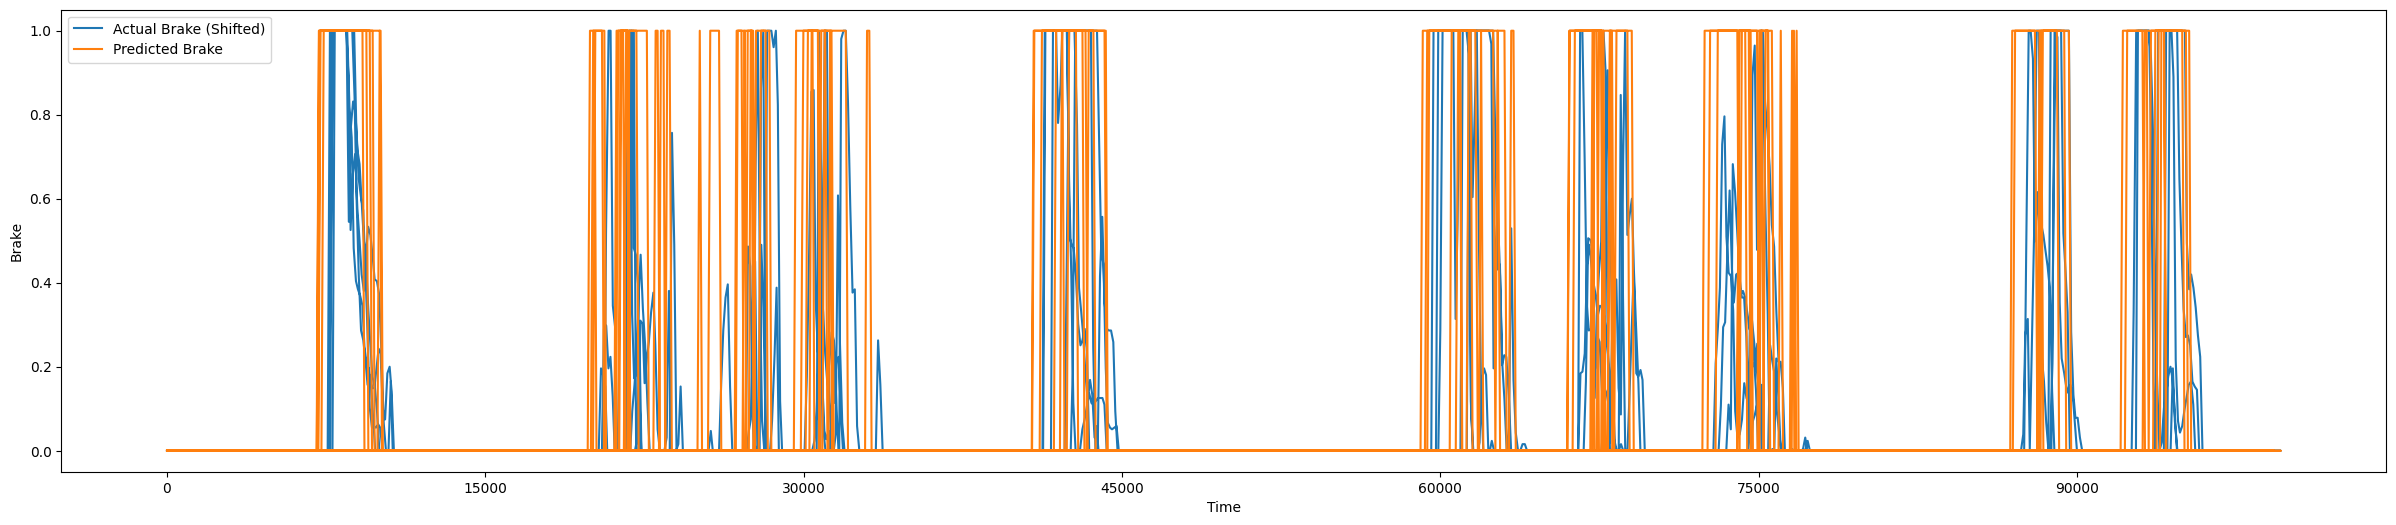

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import binarize
import pickle

# Step 1: Data Preprocessing
data = pd.read_csv('data.csv')
features = data[['current_lap_time', 'SPEED', 'THROTTLE','STEER','GEAR','position_x','position_y']]
labels = data['BRAKE']

# Step 2: Feature Engineering
data['prev_brake'] = data['BRAKE'].shift(5)
data['brake_event'] = (data['BRAKE'] > 0).astype(int)

# Step 3: Model Training
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
y_train = binarize(y_train.values.reshape(-1, 1), threshold=0.1).ravel()  # Binarize labels
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
y_pred = binarize(y_pred.reshape(-1, 1), threshold=0.5).ravel()  # Binarize predictions
y_test = binarize(y_test.values.reshape(-1, 1), threshold=0.1).ravel()  # Binarize actual labels
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

# Step 5: Save the Model
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

# Step 6: Plotting the Results
fig, ax = plt.subplots(figsize=(30, 6))  # Adjust the figure size as desired (width, height)

ax.plot(data['current_lap_time'], data['prev_brake'], label='Actual Brake (Shifted)')
ax.plot(data['current_lap_time'], data['brake_event'], label='Predicted Brake')
ax.set_xlabel('Time')
ax.set_ylabel('Brake')
ax.legend()

# Adjust the x-axis tick frequency
ax.xaxis.set_major_locator(plt.MaxNLocator(10))  # Specify the desired number of ticks
plt.show()

